# Aula 6 - Inferência Bayesiana


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Programa


- O paradigma Bayesiano.

- Os diferentes tipos de prioris. 

- Distribuições conjugadas. 

- Estimação Bayesiana. 

- Densidade preditiva.

- Computação Bayesiana.

- Exemplos com PyMC3.


**Referências e leituras recomendadas:**

1. Migon, H. S., Gamerman, D. and Louzada, F. (2014). Statistical Inference: An Integrated Approach, Second Edition, CRC Press.

2. Ehlers, R. (2011) Inferência Bayesiana. 
Disponível em https://sites.icmc.usp.br/ehlers/bayes/bayes.pdf . Acesso em 31/03/2021.

2. Caffo, B. (2016). Statistical Inference for Data Science. Leanpub. 
Disponível em https://leanpub.com/LittleInferenceBook 

3. https://pt.wikipedia.org/wiki/Infer%C3%AAncia_bayesiana

4. https://github.com/datawookie/talks/tree/master/2018-10-12-pycon-johannesburg



## O paradigma Bayesiano

Seja uma amostra aleatória $X_1,\ldots, X_n$ que vem de um modelo $p(x|\theta)$, $\theta \in \Theta$ e sejam $x_1,\ldots,x_n$ os dados observados.


Sob o **paradigma clássico ou frequentista**, $\theta$ é um **parâmetro fixo e desconhecido**.

Sob o **paradigma Bayesiano**, consideramos modelos probabilísticos para **representar a incerteza** a respeito de $\theta$.

Se temos informação **a priori** sobre o parâmetro $\theta$, antes de observar os dados, por que não usá-la?


### Exemplo:

Na aplicação de dados bancários que vimos na Aula 1, suponha que antes de observar os dados, exista um conhecimento prévio de que a proporção p de inadimplentes esteja em torno de 20\%. Como incorporar esse conhecimento prévio? Uma possibilidade seria considerar uma distribuição a priori beta para a proporção p.

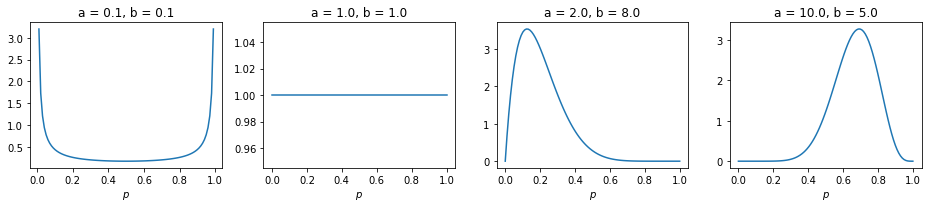

In [1]:
# Mais sobre a distribuição beta: https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_beta

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta

# Conjuntos de parâmetros da distribuição a priori para a proporção de inadimplentes
a_b_params = ((0.1, 0.1), (1, 1), (2, 8), (10, 5))
p = np.linspace(0, 1, 100)

# Plota as densidades da beta para cada conjunto de parâmetros
plt.figure(figsize=(13,3))
for i, (a, b) in enumerate(a_b_params):
    plt.subplot(1, len(a_b_params), i+1)

    prior = beta(a, b)

    plt.plot(p, prior.pdf(p))    
    plt.xlabel(r'$p$')
    plt.title("a = {:.1f}, b = {:.1f}".format(a, b))
    plt.tight_layout()




### Teorema de Bayes

Ver, por exemplo: https://pt.wikipedia.org/wiki/Teorema_de_Bayes


Sejam

- $p(\theta)$ a **distribuição a priori** para $\theta$.

- $l(\theta,x) = p(x|\theta)$ a **verossimilhança** de $\theta$.

- $p(\theta|x)$ a **distribuição a posteriori** de $\theta$.

O Teorema de Bayes ilustra o aumento de informação com a introdução do conhecimento a priori

$$p(\theta|x) = \displaystyle \frac{p(x,\theta)}{p(x)} = \frac{p(x|\theta)p(\theta)}{p(x)} = \frac{p(x|\theta) p(\theta)}{\displaystyle\int p(\theta,x) d\theta}.$$






Em outras palavras:

distribuição a posteriori $\propto$ verossimilhança $\times$ distribuição a priori





Para um valor fixo de $x$, as duas fontes de informação para $\theta$ são

- a função $l(\theta;x)=p(x|\theta)$ fornece a plausibilidade ou verossimilhança de cada um dos possíveis valores de $\theta$ e

- $p(\theta)$ é chamada distribuição a priori de $\theta$,

que, combinadas, levam à distribuição a posteriori de $\theta$, $p(\theta|x)$.


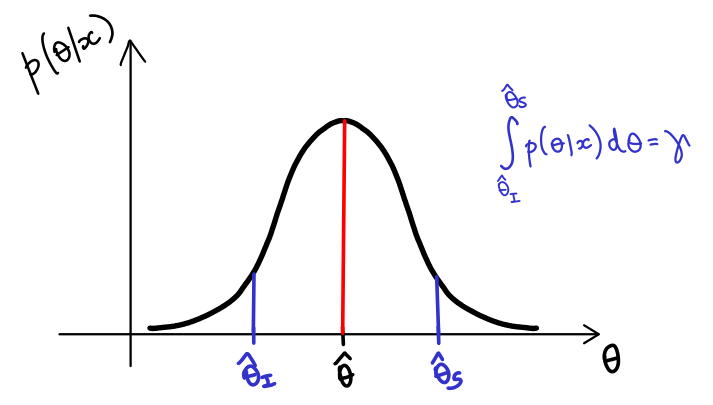



Assim, a forma usual do teorema de Bayes é
$p(\theta|x) \propto l(\theta;x)p(\theta).$ 


O termo omitido $p(x)$ é apenas uma constante normalizadora e não depende de $\theta$. 



Para $x$ fixo, a **verossimilhança**  fornece a **plausibilidade** de cada um dos possíveis valores de $\theta$.

Já a **distribuição a priori** $p(\theta)$ incorpora o **conhecimento do pesquisador**.

Essas duas quantidades combinadas são levadas à **distribuição a posteriori** de $\theta$.

A **distribuição a posteriori** de $\theta$ dados $x_1,\ldots,x_n$ observados é dada por:

$$p(\theta|x_1,\ldots,x_n) = \displaystyle\frac{p(x_1,\ldots,x_n|\theta)p(\theta)}{\int_{\Theta} p(x_1,\ldots,x_n|\theta)p(\theta)d\theta}$$




- $p(x_1,\ldots,x_n|\theta) = \displaystyle\prod_{i=1}^n p(x_i|\theta)  = L(\theta|x_1,\ldots,x_n)$ é a **função de verossimilhança** de $\theta$.


- O denominador $$\int_{\Theta} p(x_1,\ldots,x_n|\theta)p(\theta)d\theta = C(x_1,\ldots,x_n).$$


É comum escrever que 


$p(\theta|x_1,\ldots,x_n) = \displaystyle\frac{ L(\theta|x_1,\ldots,x_n) p(\theta)}{ C(x_1,\ldots,x_n)}\propto L(\theta|x_1,\ldots,x_n) p(\theta)$,



## Distribuição preditiva

A constante normalizadora da posteriori pode ser facilmente recuperada pois $p(\theta|x)=kp(x|\theta)p(\theta)$ onde

$k^{-1}= \int p(x|\theta)p(\theta)d\theta=E_\theta[p(X|\theta)]= p(x)$

chamada **distribuição preditiva** (ou marginal) de $X$. 


Esta é a distribuição esperada para a observação $x$ dado $\theta$. Assim,

- Antes de observar $X$ podemos checar a adequação da priori fazendo predições via $p(x)$.

- Se $X$ observado recebia pouca probabilidade preditiva então o modelo deve ser questionado, revisado, ou existe observação aberrante.




Se, após observar $X=x$, estamos interessados na previsão de uma quantidade $Y$, também relacionada com $\theta$, e descrita probabilisticamente por $p(y|\theta)$ então

$$p(y|x)=\int p(y,\theta| x)d\theta =\displaystyle \int p(y|\theta,x)p(\theta| x)d\theta$$

Os conceitos de priori e posteriori são relativos àquela observação que está sendo considerada no momento. Assim, $p(\theta| x)$ é a posteriori de $\theta$ em relação a $X$ (que já foi observado) mas é a priori de $\theta$ em relação a $Y$ (que não foi observado ainda).

Após observar $Y=y$ uma nova posteriori (relativa a $X=x$ e $Y=y$) é obtida aplicando-se novamente o teorema de Bayes. 



**Exemplo** (Gamerman e Migon, 1993) 

Um médico "desconfia" que um paciente pode ter uma doença. Baseado na sua experiência, no seu conhecimento sobre esta doença e nas informações dadas pelo paciente, **ele assume que a probabilidade do paciente ter a doença é 0.7**. A quantidade de interesse, desconhecida, é definida como 

$\theta = \left\{\begin{array}{l} 1,\quad \mbox{se o paciente tem a doença,} \\ 0,\quad \mbox{se o paciente não tem a doença.}\end{array}\right.$


Para aumentar sua quantidade de informação sobre a doença o médico aplica um teste $X$ relacionado com $\theta$ através da distribuição

$P(X=1|\theta=0)=0.40$   e

$P(X=1|\theta=1)=0.95$

e o resultado do teste foi positivo (ou seja, observou-se $X=1$).

É bem intuitivo que a probabilidade de doença deve ter aumentado após este resultado e a questão aqui é quantificar este aumento. Usando o teorema de Bayes, segue que

$P(\theta=1|X=1)\propto l(\theta=1;X=1)p(\theta=1)=(0.95)(0.7)=0.665$

$P(\theta=0|X=1)\propto l(\theta=0;X=1)p(\theta=0)=(0.40)(0.3)=0.120.$

A constante normalizadora é tal que $P(\theta=0|X=1)+P(\theta=1|X=1)=1$, i.e., 

$k(0.665)+k(0.120)=1$ e $k=1/0.785$. 

Portanto, a distribuição a posteriori de $\theta$ é

$P(\theta=1|X=1)=0.665/0.785=0.847$

$P(\theta=0|X=1)=0.120/0.785=0.153.$

O aumento na probabilidade de doença não foi muito grande porque a verossimilhança $l(\theta=0;X=1)$ também era grande (o modelo atribuia uma plausibilidade grande para $\theta=0$ mesmo quando $X=1$).

Agora o médico aplica outro teste $Y$ cujo resultado está relacionado a $\theta$ através da seguinte distribuição

$P(Y=1|\theta=0)=0.04$   e 

$P(Y=1|\theta=1)=0.99.$

Mas antes de observar o resultado deste teste é interessante obter sua distribuição preditiva. 

Como $\theta$ é uma quantidade discreta segue que

$p(y|x)=\sum_\theta p(y|\theta)p(\theta|x)$

e note que $p(\theta|x)$ é a priori em relação a $Y$.


Assim,


$P(Y=1|X=1)=P(Y=1|\theta=0)P(\theta=0|X=1)+P(Y=1|\theta=1)P(\theta=1|X=1)$ 

$=(0.04)(0.153) + (0.99)(0.847) = 0.845$ 
 
$P(Y=0|X=1)=1-P(Y=1|X=1) = 0.155.$ 	 

O resultado deste teste foi negativo ($Y=0$). 

Neste caso, é também intuitivo que a probabilidade de doença deve ter diminuido e esta redução será quantificada por uma nova aplicação do teorema de Bayes,

$P(\theta=1|X=1,Y=0)\propto\displaystyle l(\theta=1;Y=0)P(\theta=1|X=1)\propto\displaystyle (0.01)(0.847)=0.0085$ 	

$P(\theta=0|X=1,Y=0)\propto\displaystyle l(\theta=0;Y=0)P(\theta=0|X=1)\propto\displaystyle (0.96)(0.153)=0.1469.$ 	 

A constante normalizadora é $1/(0.0085+0.1469)=1/0.1554$ e assim a distribuição a posteriori de $\theta$ é

$P(\theta=1|X=1,Y=0)=0.0085/0.1554=0.055$

$P(\theta=0|X=1,Y=0)=0.1469/0.1554=0.945.$

Verifique como a probabilidade de doença se alterou ao longo do experimento


$P(\theta=1) = \left\{\begin{array}{ll} 0.7 & \mbox{antes dos testes}\\0.847 & \mbox{após o teste X}\\ 0.055 & \mbox{após X e Y}\end{array}\right.$



Note também que o valor observado de $Y$ recebia pouca probabilidade preditiva. Isto pode levar o médico a repensar o modelo, i.e.,

(i) Será que $P(\theta =1)=0.7$ é uma priori adequada?

(ii) Será que as distribuições amostrais de $X$ e $Y$ estão corretas? O teste $X$ é tão inexpressivo e $Y$ é realmente tão poderoso? 


## Os diferentes tipos de prioris


Destacamos as distribuições a priori 

- **Priori não-informativa**
    - Uniforme
    - Priori vaga (às vezes imprópria)

- **Priori informativa**
    - Conhecimento do pesquisador dá informação sobre os parâmetros

- **Priori conjugada**
    - Priori e posteriori tem a mesma distribuição, a menos dos parâmetros (em geral facilita os cálculos)

### Distribuições conjugadas

Leituras recomendadas:

- Notas Ricardo Ehlers e Paulo Justiniano: http://www.leg.ufpr.br/~paulojus/CE227/ce227/node1.html

- Conjugate Prior Explained, with examples & proofs: https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb



Vantagem de usar distribuições a priori conjugadas: principalmente **ganho de custo computacional.**

 <table>
  <tr>
    <td> </td>
    <th>Priori</th>
    <th>Núcleo da Verossimilhança</th>
    <th>Posteriori</th>
  </tr>
  <tr>
    <th>$\theta$ proporção</th>
    <td>Beta</td>
    <td>Bernoulli </td>
    <td>Beta</td>    
  </tr>
  <tr>
    <th>$\theta$ média</th>
    <td> Normal</td>
    <td> Normal </td>
    <td> Normal</td>
  </tr>
      <tr>
    <th>taxa de falha</th>
    <td> Gama</td>
    <td> Poisson </td>
    <td> Gama</td>
  </tr>
          <tr>
    <th></th>
    <td> Dirichlet</td>
    <td> Multinomial </td>
    <td> Dirichlet</td>
  </tr>
</table> 

### Exemplo de priori conjugada beta-Bernoulli

Ver https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb



No exemplo do banco, se considerarmos que


- $X=\left\{ \begin{array}{lll} 1, &\mbox{se o cliente é classificado como inadimplente,} \\ 0, &\mbox{caso contrário.} \end{array}\right.$


- $X \sim Bernoulli(p)$


- Verossimilhança:

Para $n$ suficientemente grande, pelo TLC sabemos que a distribuição amostral de $\bar{X}$ se aproxima da normal $$\bar{X} \sim N\left(p, \displaystyle{\frac{p(1-p)}{n}}\right)$$


Além disso, $Y = \sum_{i=1}^{n} X_i \sim binomial(n, p)$.




- Priori: $p \sim beta(2, 8)$


- Posteriori: $p|k \sim beta(k+a, n-k+b)$

onde $k$ é o número de sucessos observados na amostra.



In [3]:
import pandas as pd

# pkgdir = '/home/cibele/Google Drive/MBA/ECD/Data'


# Dados banco - Leitura dos dados
# dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0, decimal=',')
dados = pd.read_csv('dados_banco.csv', index_col=0, decimal=',')

dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
1,1,M,33,Privada,6019,1084.98,0.0,0.0,1214.35,0
2,2,F,31,Pública,5134,532.09,0.0,0.0,1662.96,0
3,3,M,31,Pública,5286,719.91,0.0,0.0,2167.97,0
4,4,F,32,Privada,5534,547.47,0.0,0.0,639.13,1
5,5,F,28,Autônomo,4559,412.81,0.0,0.0,1466.96,1


In [4]:
# Vamos trabalhar com uma amostra

import random

a = 2
b = 8

amostra = dados.sample(n=500, replace=False, random_state=10)

n = len(amostra)
k = amostra['Inadimplente'].sum()
posteriori = beta(a + k, n - k + b) 

k/n

0.242

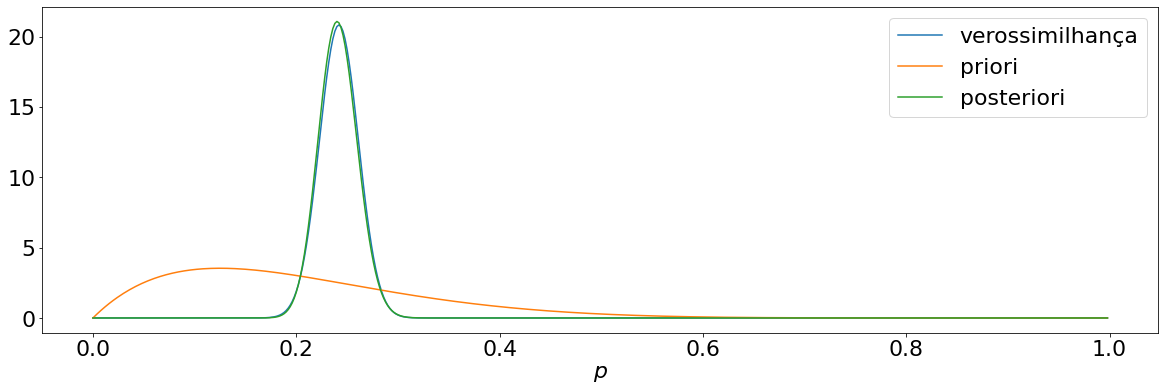

In [5]:
from scipy.stats import norm

# Eixo x entre 0 e 1 de .002 em .002.
x_axis = np.arange(0, 1, 0.002)

# Plota as densidades da beta para cada conjunto de parâmetros
plt.figure(figsize=(20,6))
    
prior = beta(a, b)

p_chapeu = amostra['Inadimplente'].mean()
dp = np.sqrt(p_chapeu*(1-p_chapeu)/n)    # pelo TLC, dp distr.binomial

media = p_chapeu
dp = np.sqrt(media*(1-media)/n)

plt.s = 0
plt.rcParams.update({'font.size': 22})

plt.plot(x_axis, norm.pdf(x_axis, media, dp), label='verossimilhança')  # pdf: probability density function
plt.plot(x_axis, prior.pdf(x_axis), label='priori')
plt.plot(x_axis, posteriori.pdf(x_axis), label='posteriori')    
plt.xlabel(r'$p$')
plt.legend()


In [6]:
# Estimador bayesiano EAP (Esperança a posteriori)
print('Média: %.2f' % posteriori.mean())


# E para calcular um intervalo de credibilidade, decidimos uma probabilidade 
# Por exemplo 95% para a credibilidade
# Uma maneira seria definir que 2,5% de cada cauda como os limites do intervalo (chamado intervalo simétrico)
# Este método é válido quando a posteriori se aproxima de uma distribuição simétrica, 
# pois nesse caso tende a gerar o intervalo com menor amplitude
# A seguir, apresentamos outra solução com um intervalo de credibilidade de menor amplitude.
# ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at
# ppf(): Percent point function (inverse of cdf)

LI = posteriori.ppf(.025)
LS = posteriori.ppf(.975)
print("Intervalo com 95% de credibilidade: {:.3f}, {:.3f})".format(LI,LS))


Média: 0.24
Intervalo com 95% de credibilidade: 0.205, 0.279)


## Estimação Bayesiana


Leituras recomendadas:

- Notas Ricardo Ehlers e Paulo Justiniano: http://www.leg.ufpr.br/~paulojus/CE227/ce227/node1.html

- Migon, H. S., Gamerman, D. and Louzada, F. (2014). Statistical Inference: An Integrated Approach, Second Edition, CRC Press.


### Introdução à Teoria da Decisão

Um problema de decisão fica completamente especificado pela descrição dos seguintes espaços:

(i) Espaço do parâmetro ou estados da natureza, $\Theta$. 
    
(ii) Espaço dos resultados possíveis de um experimento, $\Omega$. 
    
(iii) Espaço de possíveis ações, $A$. 

Uma regra de decisão $\delta$ é uma função definida em $\Omega$ que assume valores em $A$, i.e. $\delta:\Omega\rightarrow A$. A cada decisão $\delta$ e a cada possível valor do parâmetro $\theta$ podemos associar uma **perda** $L(\delta,\theta)$ assumindo valores positivos. Definimos assim uma **função de perda**.

**Definição:** O **risco de uma regra de decisão**, denotado por $R(\delta)$, é a **perda esperada a posteriori**, i.e. $$R(\delta)=E_{\theta\vert\mathbf{x}} [L(\delta,\theta)].$$

Uma regra de decisão $\delta^*$ é **ótima** se tem risco mínimo, i.e. $R(\delta^*)<R(\delta), ~\forall \delta$. Esta regra será denominada **regra de Bayes** e seu risco, **risco de Bayes**. 

**Exemplo**:

Um laboratório farmaceutico deve decidir pelo lançamento ou não de uma nova droga no mercado. O laboratório só lançará a droga se achar que ela é eficiente mas isto é exatamente o que é desconhecido. 
 
 Podemos associar um parâmetro $\theta$ aos estados da natureza: 
 
- droga é eficiente ($\theta=1$), 
 
- droga não é eficiente ($\theta=0$) 
 
e as possíveis ações como 

 
- lança a droga ($\delta=1$), 
 
- não lança a droga ($\delta=0$). 
 
 Suponha que foi possível construir a seguinte tabela de perdas levando em conta a eficiência da droga,
 
 <table>
  <tr>
      <th></th> 	
    <th>eficiente ($\theta=1$)</th> 	
    <th>não eficiente ($\theta=0$)</th>
  </tr>
  <tr>      
    <th>lança ($\delta=1$)</th> 	
    <th>-500</th> 	
    <th>600</th>
    </tr>
    <tr>      
    <th> não lança ($\delta=0$)</th> 	
    <th>1500</th> 	
    <th>100</th>
    </tr>
  </table>
       

Vale notar que estas perdas traduzem uma **avaliação subjetiva** em relação à gravidade dos erros cometidos.

Suponha agora que a incerteza sobre os estados da natureza é descrita por

$P(\theta=1)=\pi$, $0<\pi<1$ 

avaliada na distribuição atualizada de $\theta$ (seja a priori ou a posteriori). 


Note que, para $\delta$ fixo, $L(\delta,\theta)$ é uma variável aleatória discreta assumindo apenas dois valores com probabilidades $\pi$ e $1-\pi$. 

Assim, usando a definição de risco obtemos que


$\displaystyle R(\delta=0) = \displaystyle E(L(0,\theta))=\pi 1500 +(1-\pi) 100 = 1400\pi + 100$ 	

$\displaystyle R(\delta=1) = \displaystyle E(L(1,\theta))=\pi(-500)+(1-\pi) 600 =-1100\pi + 600$ 	 

Uma questão que se coloca aqui é, para que valores de $\pi$ a regra de Bayes será de lançar a droga. 

Não é difícil verificar que as duas ações levarão ao mesmo risco, i.e.

$R(\delta=0)=R(\delta=1)$ se somente se $\pi=0.20$. 

Além disso, para $\pi<0.20$ temos que $R(\delta=0)<R(\delta=1)$ e a regra de Bayes consiste em **não lançar a droga** enquanto que $\pi>0.20$ implica em $R(\delta=0)>R(\delta=1)$ e a regra de Bayes deve ser de **lançar a droga**. 


### Estimadores de Bayes

Considere uma amostra aleatória $X_1,\dots,X_n$, tomada de uma distribuição com função de (densidade) de probabilidade $p(x\vert\theta)$, onde o valor do parâmetro $\theta$ é desconhecido. 

Em um problema de inferência como este o valor de $\theta$ deve ser estimado a partir dos valores observados na amostra.

Se $\theta\in\Theta$ então é razoável que os possíveis valores de um estimador $\delta(\mathbf{x})$ também devam pertencer ao espaço $\Theta$. 

Além disso, um bom estimador é aquele para o qual, com alta probabilidade, apresenta o seguinte erro $$\delta(\mathbf{x})-\theta$$ próximo de zero.




### Funções de perda



Para cada possível valor de $\theta$ e cada possível estimativa $a\in\Theta$ vamos associar **uma perda** $L(a,\theta)$ de modo que quanto maior a distância entre $a$ e $\theta$ maior o valor da perda. A perda esperada a posteriori é dada por

$$E[L(a,\theta)\vert\mathbf{x}] = \int L(a,\theta)p(\theta\vert\mathbf{x}) d\theta$$

O **estimador de Bayes** será aquele que minimiza a perda esperada.


#### Função de perda quadrática

$$L(a,\theta)=(a-\theta)^2$$ 

O estimador de Bayes para $\theta$ será a **média de sua distribuição atualizada** (EAP: expected a posteriori).



#### Função de perda absoluta
(introduz punições que crescem linearmente com o erro de estimação)

$$L(a,\theta)=\vert a-\theta\vert$$

O estimador de Bayes para $\theta$ é a **mediana de sua distribuição atualizada**.



#### Função de perda 0-1

(associam uma perda fixa a um erro cometido, não importando sua magnitude)

$$L(a,\theta)=\left\{ \begin{array}{ccc} 1 &\mbox{se}& |a-\theta|>\epsilon \\ 0 &\mbox{se}& |a-\theta|<\epsilon \end{array}\right.$$

para todo $\epsilon>0$. 

Neste caso, o estimador de Bayes é a **moda da distribuição atualizada de $\theta$** (MAP: maximum a posteriori). 

A moda da posteriori de $\theta$ também é chamado de estimador de máxima verossimilhança generalizado (EMVG) e é o mais fácil de ser obtido dentre os estimadores vistos até agora.


**Exemplo:**

Suponha que queremos estimar a proporção $\theta$ de itens defeituosos em um grande lote. Para isto será tomada uma amostra aleatória $X_1,\dots,X_n$ de uma distribuição de Bernoulli com parâmetro $\theta$. Usando uma priori conjugada beta($a,b$), após observar a amostra a distribuição a posteriori é beta($a+k,b+n-k$) onde $k=\sum_{i=1}^n x_i$. 

A média desta distribuição beta é dada por $(a+k)/(a+b+n)$ e portanto o estimador de Bayes de $\theta$ usando perda quadrática é

$\delta(\mathbf{x})= \displaystyle\frac{a+\sum_{i=1}^n X_i}{a+b+n}.$


### Estimação por Intervalos

Pode-se desenvolver a estimação por intervalos por meio do **intervalo de credibilidade (ou intervalo de confiança Bayesiano)** baseado no distribuição a posteriori.



**Definição:**

C é um **intervalo de credibilidade** de 100(1-$\alpha$)$\%$, ou nível de credibilidade (ou confiança) $1-\alpha$, para $\theta$ se $P(\theta\in C)\ge 1-\alpha$.



Obs: Quanto menor for o tamanho do intervalo, mais concentrada é a distribuição do parâmetro, ou seja o tamanho do intervalo informa sobre a dispersão de $\theta$. 


O **intervalo com o menor comprimento possível** é obtido tomando-se os valores de $\theta$ com maior densidade a posteriori, e esta idéia é expressa matematicamente na definição abaixo.


**Definição:**

Um intervalo de credibilidade $C$ de 100(1-$\alpha$)% para $\theta$ é de **máxima densidade a posteriori (MDP)** se $C=\{\theta\in\Theta:p(\theta\vert\mathbf{x})\ge k(\alpha)\}$ onde $k(\alpha)$ é a maior constante tal que $P(\theta\in C)\ge 1-\alpha$.

Usando esta definição, todos os pontos dentro do intervalo MDP terão densidade maior do que qualquer ponto fora do intervalo. 

Um problema com os intervalos MDP é que eles não são invariantes a transformações 1 a 1, a não ser para transformações lineares. O mesmo problema ocorre com intervalos de comprimento mínimo na inferência clássica. 

## Computação Bayesiana

Leituras recomendadas:

- Métodos de Monte Carlo: https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Monte_Carlo

- Notas Ricardo Ehlers e Paulo Justiniano: http://www.leg.ufpr.br/~paulojus/CE227/ce227/node1.html

- Salvatier, John; Wiecki, Thomas V.; Fonnesbeck, Christopher. Probabilistic programming in Python using PyMC3. PeerJ Computer Science, v. 2, p. e55, 2016. Disponível em https://peerj.com/articles/cs-55/. Acessado em 06/04/2021.


A obtenção de informações a partir da distribuição a posteriori dos parâmetros pode envolver a avaliação de probabilidades ou esperanças, que exigem métodos computacionais baseados em simulações, como 

- Método de Monte Carlo simples

- Monte Carlo com função de importância, 

- Algoritmo de Metropolis-Hastings,

- Amostrador de Gibbs,

- Método do Bootstrap Bayesiano, 

- Monte Carlo via cadeias de Markov (MCMC), 

- Monte Carlo Hamiltoniano (HMC),

- No-U-Turn Sampler (NUTS).


HMC e NUTS aproveitam as informações de gradiente da probabilidade e alcançam uma convergência muito mais rápida do que os métodos de amostragem tradicionais, especialmente para modelos mais complexos. 

O pacote PyMC3 do Python usam a programação probabilística para executar os métodos de HMC como o NUTS. Esse tipo de programação permite a especificação flexível e ajuste de modelos estatísticos bayesianos com sintaxe intuitiva e legível, embora poderosa, que é próxima da sintaxe natural que os estatísticos usam para descrever modelos.






## Exemplos




In [15]:
# conda update --all
# conda install -c conda-forge theano
# !pip show theano

Name: Theano
Version: 1.0.5
Summary: Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.
Home-page: http://deeplearning.net/software/theano/
Author: LISA laboratory, University of Montreal
Author-email: theano-dev@googlegroups.com
License: BSD
Location: c:\users\joaop\anaconda3\lib\site-packages
Requires: six, numpy, scipy
Required-by: 


In [16]:
# !pip install pymc3==3.11.1


  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529958 sha256=986892e543cdf61554086f12b2fb6a6a52695b5bc5b84b4f4c6703a0aa7c69c1
  Stored in directory: c:\users\joaop\appdata\local\pip\cache\wheels\0e\41\d2\82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [17]:
# !pip install arviz==0.11.2

In [18]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [19]:
!pip show pymc3

Name: pymc3
Version: 3.11.1
Summary: Probabilistic Programming in Python: Bayesian Modeling and Probabilistic Machine Learning with Theano
Home-page: http://github.com/pymc-devs/pymc3
Author: None
Author-email: None
License: Apache License, Version 2.0
Location: c:\users\joaop\anaconda3\lib\site-packages
Requires: patsy, fastprogress, scipy, dill, theano-pymc, arviz, numpy, pandas, typing-extensions
Required-by: 


In [20]:
!pip show arviz

Name: arviz
Version: 0.11.2
Summary: Exploratory analysis of Bayesian models
Home-page: http://github.com/arviz-devs/arviz
Author: ArviZ Developers
Author-email: None
License: Apache-2.0
Location: c:\users\joaop\anaconda3\lib\site-packages
Requires: setuptools, numpy, typing-extensions, xarray, netcdf4, packaging, pandas, matplotlib, scipy
Required-by: pymc3


## Exemplo beta-Bernoulli: clientes do banco

In [22]:
with pm.Model() as model:
    p = pm.Beta("p", 2, 8)  # definição da priori com distr.beta params a=2, b=8 (a: prob=1.0, b: prob=0.0)
    obs = pm.distributions.discrete.Bernoulli("obs", p, observed=amostra['Inadimplente'])  # define verossimilhança param.p
                                                                                           # usar amostra p/ñ travar
    idata = pm.sample(2000, tune=1500, return_inferencedata=True)   # definição da posteriori com 2000 amostras
                                                                    # step: default é o método NUTS para amostragem
                                                                    # chains: default min 4 cadeias independentes


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 48 seconds.


In [23]:
az.summary(idata)          # estatística da amostra da posteriori; hdi: intervalo de max densidade; 
                           # r_rat informa se convergiu (=1 é bom)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.241,0.019,0.206,0.276,0.0,0.0,3704.0,6008.0,1.0


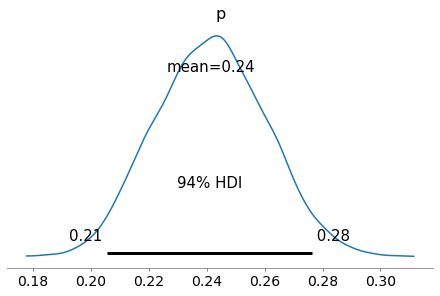

In [24]:
az.plot_posterior(idata);          # densidade da posteriori


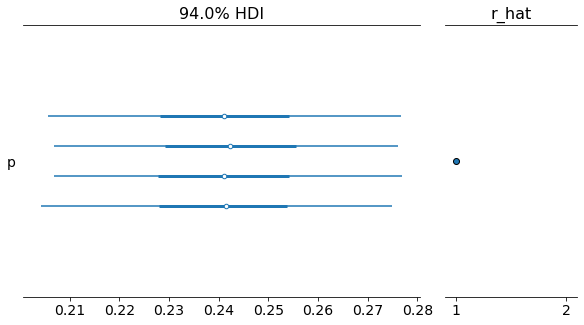

In [25]:
az.plot_forest(idata, r_hat=True);    # intervalos de credibilidade p/ as 4 cadeias (default do pymc3)
                                      # ficou entre 0.21 e 0.28

## Exemplo: normal com dados simulados

Fonte: https://docs.pymc.io/pymc-examples/examples/pymc3_howto/api_quickstart.html

In [26]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)                 # priori de mu
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))    # verossimilhança c/ 100 valores gerados  
        
# notar que não definimos priori para o sigma, assumimos que o sigma não tem uma distribuição de probabilidade

In [27]:
model.basic_RVs          # variáveis aleatórias observáveis e não observáveis do modelo - RV:Random Variables

[mu ~ Normal, obs ~ Normal]

In [28]:
model.free_RVs          # variável livre - RV:Random Variables

[mu ~ Normal]

In [29]:
model.observed_RVs      # variável observada - RV:Random Variables

[obs ~ Normal]

In [30]:
model.logp({"mu": 0})    # valor da log verossimilhança


array(-142.33956732)

In [31]:
%timeit model.logp({mu: 0.1})
logp = model.logp
%timeit logp({mu: 0.1})

54.6 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.1 µs ± 914 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Variáveis aleatórias não observáveis

In [32]:
with pm.Model():
    x = pm.Normal("x", mu=0, sigma=1)   # priori de x



In [33]:
x.logp({"x": 0})              # valor da verossimilhança



array(-0.91893853)

### Variáveis aleatórias observáveis

In [34]:
with pm.Model():
    obs = pm.Normal("x", mu=0, sigma=1, observed=np.random.randn(100))  # verossimilhança

In [35]:
obs.observations      # todas as observações

array([ 0.84202432,  0.26487001,  0.23277989,  0.23117159, -0.13046864,
       -1.34204707,  0.74694507, -0.44353083, -0.0314039 , -0.75288884,
        0.53037137, -0.99981547,  0.47875241, -1.02006024,  0.45969963,
       -0.80806071, -0.36748247,  0.61888481, -1.04891517, -0.23281172,
        2.77948812,  2.01828961, -0.21887272, -0.71774595,  0.40040535,
       -1.15843608,  0.89173267, -0.22876498,  0.03727976, -1.32383095,
       -1.5659124 , -2.05584654, -0.48805206,  0.88743589,  0.93601647,
       -0.80731222, -0.18003484,  2.26164996,  0.76188095,  1.03776531,
        0.14067782,  1.49483709, -0.23124719, -0.6819887 , -0.30182464,
        0.48472285,  0.92818358,  2.46901645, -1.0582521 ,  2.40286822,
       -2.8346459 ,  0.69288974,  1.33241623,  0.44220018, -0.68330483,
        1.71433428,  0.39975583, -0.64582681, -0.16004871,  0.98886534,
       -1.39892395,  1.17135502,  0.12475123, -0.89734471, -2.46581797,
        0.25650576,  0.37288498,  0.52705831,  0.16286984,  0.78

C:\Users\joaop\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


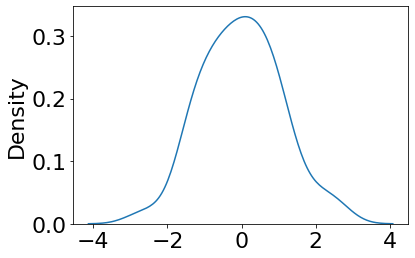

In [36]:
import seaborn as sns
sns.distplot(obs.observations, hist=False);  # gráfico da densidade alisada com distplot

## Inferência

### Amostragem

In [37]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    idata = pm.sample(2000, tune=1500, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_500 tune and 2_000 draw iterations (6_000 + 8_000 draws total) took 47 seconds.


In [38]:
idata.posterior.dims     # número de cadeias e de amostras

Frozen(SortedKeysDict({'chain': 4, 'draw': 2000}))

### Amostragem com 6 cadeias em paralelo

chains : int
    The number of chains to sample. Running independent chains is important for some
    convergence statistics and can also reveal multiple modes in the posterior. If ``None``,
    then set to either ``cores`` or 2, whichever is larger.
cores : int
    The number of chains to run in parallel. If ``None``, set to the number of CPUs in the
    system, but at most 4.

In [39]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    idata = pm.sample(cores=4, chains=6, return_inferencedata=True)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 4 jobs)
NUTS: [mu]


Sampling 6 chains for 1_000 tune and 1_000 draw iterations (6_000 + 6_000 draws total) took 66 seconds.


In [40]:
idata.posterior["mu"].shape    # forma da posteriori (cadeias, valores)


(6, 1000)

### Podemos incluir passos com outros métodos 

In [41]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.randn(100))

    step = pm.Metropolis()                 # passo para amostragem com método Metropolis (default: NUTS)
    trace = pm.sample(1000, step=step)


C:\Users\joaop\anaconda3\lib\site-packages\pymc3\sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [42]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=1)    # priori para mu
    sd = pm.HalfNormal("sd", sigma=1)      # priori para sd: Normal só com valores positivos
    obs = pm.Normal("obs", mu=mu, sigma=sd, observed=np.random.randn(100))

    step1 = pm.Metropolis(vars=[mu])       # passo 1 para amostragem com método Metropolis
    step2 = pm.Slice(vars=[sd])            # passo 2 para amostragem com método Slice
    idata = pm.sample(10000, step=[step1, step2], cores=4, return_inferencedata=True)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>Slice: [sd]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 60 seconds.
The number of effective samples is smaller than 25% for some parameters.


### Análise de resultados

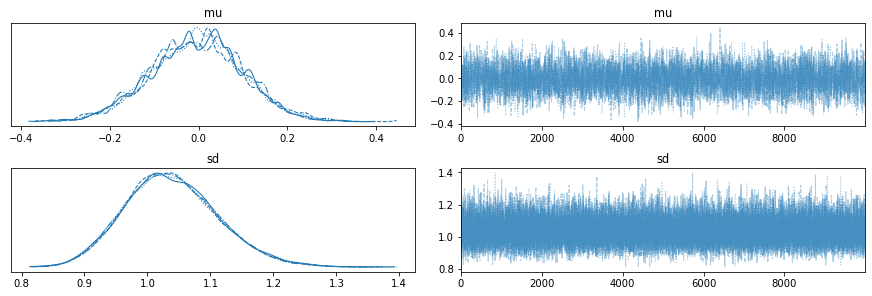

In [43]:
az.plot_trace(idata);
# posteriori do mu e do sigma | cadeias no mu e do sigma

### Estatística de Gelman-Rubin (R chapéu)

In [44]:
az.summary(idata)  # estatísticas a posteriori; hdi: densidades a posteriori

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-0.004,0.104,-0.202,0.190,0.001,0.001,6570.0,6235.0,1.0
sd,1.039,0.074,0.906,1.182,0.000,0.000,38795.0,28890.0,1.0


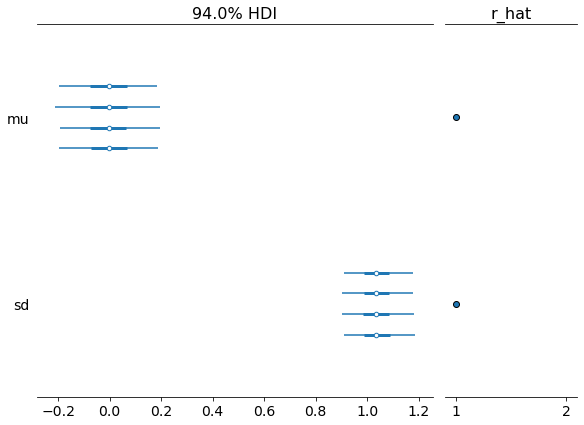

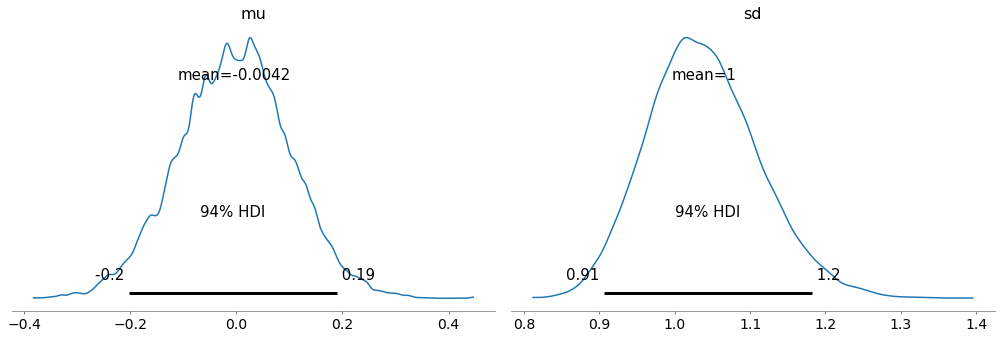

In [45]:
az.plot_forest(idata, r_hat=True);

az.plot_posterior(idata);


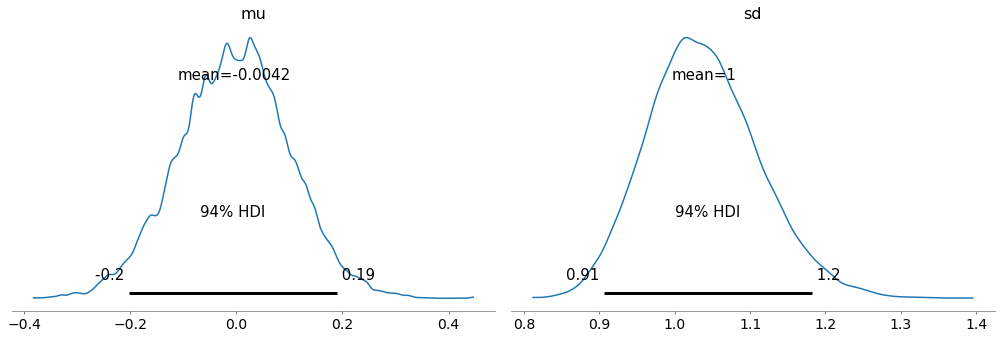

In [46]:
az.plot_posterior(idata);



Applet (mini-software) para simulação de funções:   
https://homepage.divms.uiowa.edu/~mbognar/